In [ ]:
# Importacion de las bibliotecas que se ocuparan
import numpy as np 
import matplotlib.pyplot as plt
# Libreria para poder hacer la animacion
!pip install celluloid
from celluloid import Camera

# Coondiciones iniciales
alpha = 500
nodos = 101
d_x = 1
d_t = 0.001
pasos = 1001
frecuencia = 10
periodo = int(pasos/frecuencia)

# MALLA ESPACIAL
x = np.array([ d_x*i for i in range(nodos)])

# MALLA TEMPORAL
t = np.array([ d_t * i for i in range(pasos)])

# Condicion de Courant
c = alpha * (d_t / d_x)

# Arreglo numerico de apoyo para almacenar los valores obtenidos
U = np.zeros((pasos,nodos))


U[1:periodo,1] = np.sin(2 * np.pi * frecuencia * t[1:periodo])
U[1:periodo,2] = np.sin(2 * np.pi * frecuencia * t[1:periodo])

for j in range(3,pasos):
    for i in range (2, nodos-1):
      U1 = 2 * U[j-1,i] - U[j-2,i]
      U2 = U[j-1,i-1] - 2 * U[j-1,i] + U[j-1,i+1]
      U[j,i] =U1 + (c**2) * U2;

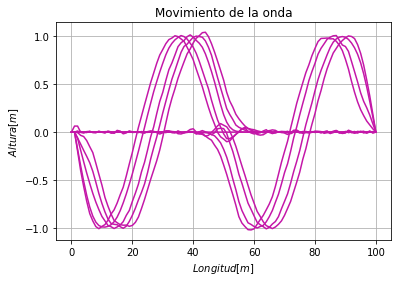

In [ ]:
# Grafica de la solucion 
tiempos=np.arange(1,1001,100)
fig, ax = plt.subplots()

for i in tiempos:
  ax.plot(x,U[i,:],color = "#C417A8" )
  ax.set_title('Movimiento de la onda')
  ax.set_xlabel(r'$Longitud [m]$')
  ax.set_ylabel(r'$Altura [m]$')
  ax.grid(True)


In [ ]:
# Modificamos el arreglo tiempo para hacer la animacion
tiempos=np.arange(1,1001,3)

# Funcion para poder graficar
def fun(i):
    y = U[i,:]
    return y

fig = plt.figure()

# Establecemos los limitees
plt.xlim(0,100)
plt.ylim(-1.1, 1.2)

# Creamos un ciclo for para las imagenes
camera = Camera(fig)
for i in tiempos:
    # Mandamos llamar a la funcion fun(i)
    plt.plot(x, fun(i) , color = '#C417A8')
    plt.title('Movimiento de la onda')
    plt.xlabel(r'$Longitud [m]$')
    plt.ylabel(r'$Altura [m]$')
    plt.grid()
    camera.snap()

# Guardamos la animacion
animacion = camera.animate()
animacion.save('animacion.mp4')